In [287]:
import numpy as np
import plot_helpers

what is a state X?

$X = (x, y, \theta, m_{1,x}, m_{1,y}, ...., m_{n,x}, m_{n,y}$)$^T$

$m_i$ = landmark i

In [288]:
N = 10 #no of landmarks
inf = 1e6
dt = 0.1
mu0 = np.zeros((2*N+3)).T
sigXX = np.zeros((3,3))
sigXM = np.zeros((3,2*N))
sigMX = np.zeros((2*N,3))
sigMM = np.eye(2*N)*inf
sig0 = np.vstack((np.hstack((sigXX, sigXM)), np.hstack((sigMX, sigMM))))
print(mu0)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


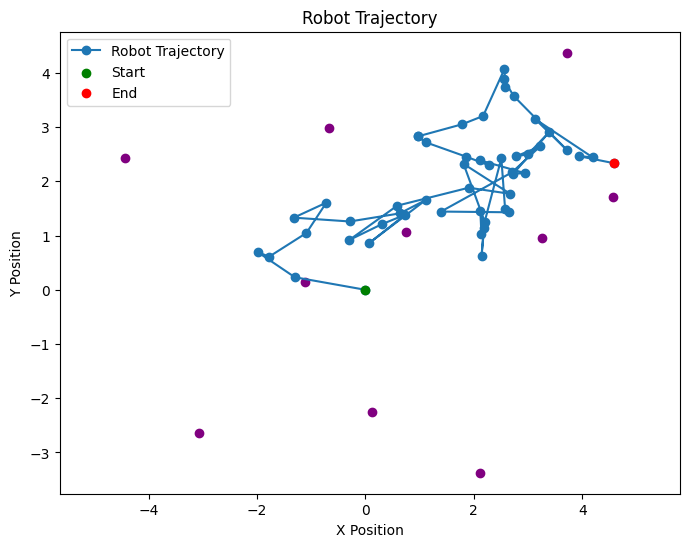

In [297]:
#generate random input sequence (according to velocity model)
from plot_helpers import plot_trajectory


def gen_U(num_steps, v_max=15, w_max=10):

    v = np.random.uniform(-v_max, v_max, num_steps)
    w = np.random.uniform(-w_max, w_max, num_steps)
    u = np.column_stack((v,w))
    return u

def gen_landmarks():
    x = np.random.uniform(-5, 5, N)
    y = np.random.uniform(-5, 5, N)
    landmarks = np.column_stack((x,y))
    return landmarks

u = gen_U(50)
landmarks = gen_landmarks()
plot_trajectory(landmarks, mu0=np.array([0, 0, 0]), u=u, dt=dt)
    

In [290]:
def ekf(mu, cov, u, Rt):
    
    def predict():
        v,w = u[0], u[1]
        ratio = v/w
        motion = np.array([[-ratio*np.sin(mu[2]) + ratio*np.sin(mu[2]+w*dt)], [ratio*np.cos(mu[2]) - ratio*np.cos(mu[2]+w*dt)], [w*dt]])
        #to map to 2N+3 dimensions
        F = np.hstack((np.eye(3),np.zeros((3,2*N)))).T
        #predict mu
        mu_pred = mu + F@motion.flat
        #get jacobian of motion model
        Gx = np.eye(3) + np.array(([[0,0,-ratio*np.cos(mu[2]) + ratio*np.cos(mu[2]+dt)], [0,0,-ratio*np.sin(mu[2]) + ratio*np.sin(mu[2]+w*dt)], [0,0,0]]))
        #to map to 2N+3 dimensions
        Gt = np.vstack((np.hstack((Gx,np.zeros((3,2*N)))), np.hstack((np.zeros((2*N,3)), np.eye(2*N)))))
        cov_pred = Gt@cov@Gt.T + Rt

        return mu_pred, cov_pred
    
    def correct():
        pass

ekf(mu0, sig0, u[0], np.random.normal(0,0.1,2*N+3))
